In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 

In [2]:
readin = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/BikeData.csv')

data = readin[readin['Rented Bike Count'] != 0].reset_index()

data

,index,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8461,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8462,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8463,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


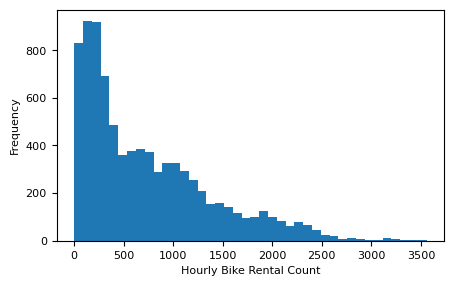

6.087200050530081
1.1630714057346654


In [3]:
plt.figure(figsize=(5,3))
plt.xlabel('Hourly Bike Rental Count', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

rented = data['Rented Bike Count']
n = len(data['Rented Bike Count'])
m = rented.sum(axis=0)/n
s = np.sqrt(   (np.sum((rented - m)**2, axis=0) / (n-1)       ))

plt.hist(data['Rented Bike Count'],bins=40)
plt.show()

rentlog = np.log(rented)
nlog = len(rentlog)
mlog = rentlog.sum(axis=0)/nlog
slog = np.sqrt(   (np.sum((rentlog - mlog)**2, axis=0) / (nlog-1)       ))

print(mlog)
print(slog)

log_avg = mlog
log_std = slog

In [4]:
def standardize(arr):
    result = arr.copy()
    m = arr.sum(axis = 0)/arr.shape[0]
    s = np.sqrt(np.sum((arr - m)**2, axis=0)/(arr.shape[0]-1))
    return (result - m)/s


def preprocess(df):
    attrs = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
    dfc = df.copy()
    dfc['Holiday'] = np.where(dfc['Holiday'] == 'No Holiday',0,1)
    dfc1 = pd.get_dummies(dfc,columns=['Seasons'],prefix='',prefix_sep='',drop_first = False, dtype=int)
    dfc1['Time of Day'] = np.where(dfc1['Hour'] < 6,0,np.where(dfc1['Hour'] < 12, 1, np.where(dfc1['Hour'] < 18, 2, 3)))
    dfc1[attrs] = standardize(dfc1[attrs])
    dfc1['Rented Bike Count'] = standardize(np.log(dfc1['Rented Bike Count']))
    dfc2 = dfc1.drop(['Winter','Hour','index'],axis=1)

    return dfc2

In [5]:
data2 = preprocess(data.copy())
data2

,Date,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Autumn,Spring,Summer,Time of Day
0,1/12/2017,-0.472770,-1.484675,-1.032334,0.458402,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
1,1/12/2017,-0.661249,-1.509459,-0.983517,-0.895195,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
2,1/12/2017,-0.802967,-1.550766,-0.934701,-0.701824,0.929522,-1.634522,-0.654041,-0.132487,-0.17494,0,0,0,0,0
3,1/12/2017,-1.216066,-1.567289,-0.885884,-0.798509,0.929522,-1.626971,-0.654041,-0.132487,-0.17494,0,0,0,0,0
4,1/12/2017,-1.487863,-1.550766,-1.081151,0.555088,0.929522,-1.702486,-0.654041,-0.132487,-0.17494,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,30/11/2018,0.708083,-0.708096,-1.178784,0.845144,0.755481,-1.075711,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8461,30/11/2018,0.474062,-0.774188,-1.032334,0.555088,0.929522,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8462,30/11/2018,0.391439,-0.840279,-0.934701,-1.378622,0.876981,-1.045505,-0.654041,-0.132487,-0.17494,0,1,0,0,3
8463,30/11/2018,0.413455,-0.881587,-0.837068,-0.701824,0.698014,-1.037954,-0.654041,-0.132487,-0.17494,0,1,0,0,3


In [6]:
y = np.array(data2['Rented Bike Count'])
X = np.array(data2.iloc[:,~data2.columns.isin(['Rented Bike Count','Date'])])
print('Shape of predictor matrix X:', X.shape)
print('Shape of target vector y:', y.shape)

Shape of predictor matrix X: (8465, 13)
Shape of target vector y: (8465,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1234)

In [8]:
def invTransform(z, avg, stdev):
    
    invt = np.exp(z * stdev + avg)
    
    return(invt)

In [9]:
class Layer:
    def __init__(self, input_dim, output_dim, activation_type='linear'):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation_type = activation_type
        self.W = np.random.normal(0, 0.1, (output_dim, input_dim))
        self.b = np.zeros(output_dim)

    def activation(self, z):
        if self.activation_type == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.activation_type == 'ReLU':
            return np.maximum(0, z)
        else:
            return z

    def activation_derivative(self, z):
        if self.activation_type == 'linear':
            return np.ones_like(z)
        elif self.activation_type == 'sigmoid':
            sig = 1 / (1 + np.exp(-z))
            return sig * (1 - sig)
        elif self.activation_type == 'ReLU':
            return (z > 0).astype(int)

    def forward(self, x):
        self.x = x  # Store input for backpropagation
        self.z = np.dot(self.W, x) + self.b
        self.a = self.activation(self.z)
        return self.a
    
    def backprop(self, x, delta_l):
        # Calculate activation derivative
        grad_a = self.activation_derivative(self.a)

        # Calculate gradients with respect to weights and biases
        self.grad_W = np.outer(delta_l * grad_a, x)
        self.grad_b = delta_l * grad_a

        # Compute delta for previous layer
        delta = np.dot(self.W.T, delta_l * grad_a)

        return delta_l

In [10]:
class MultiLayerNet:
    def __init__(self, layers, learning_rate=0.001, epochs=100):
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backprop(self, x, y):
        y_hat = self.forward(x)
        delta = 2 * (y_hat - y) 

        for layer in reversed(self.layers):
            delta = layer.backprop(layer.x, delta)
            

    def fit(self, X, Y, plot_loss=False):
        losses = []
        for epoch in range(self.epochs):
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            epoch_loss = []
            for i in indices:
                x = X[i]
                y = Y[i]
                y_hat = self.forward(x)
                epoch_loss.append( ((y - y_hat) ** 2))
                self.backprop(x, y)
                for layer in (self.layers):
                    layer.W -= self.learning_rate * layer.grad_W
                    layer.b -= self.learning_rate * layer.grad_b
            losses.append(np.mean(epoch_loss))
            print(f'Epoch {epoch+1}, Loss: {np.mean(epoch_loss)}')

        if plot_loss:
            plt.plot(losses)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Training Loss')
            plt.show()

    def predict(self, X):
        return np.array([self.forward(x) for x in X])

Epoch 1, Loss: 0.7312983049922515
Epoch 2, Loss: 0.4427781731009505
Epoch 3, Loss: 0.3979546940769319
Epoch 4, Loss: 0.3746580288575553
Epoch 5, Loss: 0.3588303635374843
Epoch 6, Loss: 0.3501439961751496
Epoch 7, Loss: 0.34291637190228086
Epoch 8, Loss: 0.3384210377969936
Epoch 9, Loss: 0.33467865842441163
Epoch 10, Loss: 0.3322257232656643
Epoch 11, Loss: 0.3303872911381647
Epoch 12, Loss: 0.3290287783816253
Epoch 13, Loss: 0.328275281332668
Epoch 14, Loss: 0.3272145760847638
Epoch 15, Loss: 0.32601278204232204
Epoch 16, Loss: 0.3256474888621771
Epoch 17, Loss: 0.3247546313794657
Epoch 18, Loss: 0.3228942669110329
Epoch 19, Loss: 0.32348415700002375
Epoch 20, Loss: 0.3236337216342977
Epoch 21, Loss: 0.32334993650859023
Epoch 22, Loss: 0.323232424178179
Epoch 23, Loss: 0.3224285350790207
Epoch 24, Loss: 0.3208223892247795
Epoch 25, Loss: 0.3217805835872439
Epoch 26, Loss: 0.3210380159941891
Epoch 27, Loss: 0.32123922778039404
Epoch 28, Loss: 0.3208216931060752
Epoch 29, Loss: 0.3222555

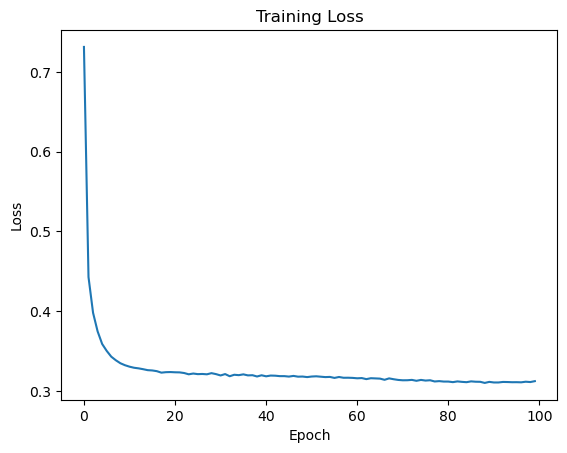

In [11]:
np.random.seed(42)
layers = [Layer(X_train.shape[1],10,'sigmoid'),Layer(10,5,'ReLU'),Layer(5,1,'linear') ]
model = MultiLayerNet(layers, learning_rate= 0.001, epochs =100)
model.fit(X_train, y_train, plot_loss = True )

In [12]:
print('\nModel performance on training set (original scale):')
Ypred = model.predict(X_train)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytrain_orig = invTransform(y_train, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytrain_orig, Ypred_orig)))

print('\nModel performance on test set (original scale):')
Ypred = model.predict(X_test)
Ypred_orig = invTransform(Ypred, log_avg, log_std)
Ytest_orig = invTransform(y_test, log_avg, log_std)
print(np.sqrt(mean_squared_error(Ytest_orig, Ypred_orig)))


Model performance on training set (original scale):
380.29640243749026

Model performance on test set (original scale):
375.3150624066573
